## Multiple XRR calculations

If we want to perform theoretical calculations for multiple systems and suppress graphical output from _anaklasis_ so that we can visualize data the way we want, we may proceed as following. First let's import _anaklasis_ and _matplotlib_ that we will use later for plotting stuff.

In [1]:
from anaklasis import anaklasis
import matplotlib.pyplot as plt

We name the project as 'none' which results in no pdf plots or ASCII file output beeing generated by _anaklasis_

In [2]:
project='none'

We then define that we will use a single patch and also add the instrumental parameters.

In [3]:
patches=[1.0]

In [4]:
resolution=[0.001]
background = [1.0e-9]
scale = [1.0]
qmax = [0.7]

We then create two identical model _lists_ for a system (air/Au/Fe/Si) with the difference beeing in the thickness of the Fe layer.

In [5]:
system_A=[]
system_A.append([
	#  Re_sld  Im_sld   thk rough solv description
	[ 0.00e-5, 0.00e-7,  0 , 3.0, 0.0, 'air'],
	[ 12.4e-5, 1.28e-5, 50,  3.0, 0.0, 'Au'],
	[ 5.94e-5, 7.69e-6, 40 , 3.0, 0.0, 'Fe'],
	[ 2.00e-5, 4.58e-7,  0 , 0.0, 0.0, 'Si'],
	])

system_B=[]
system_B.append([
	#  Re_sld  Im_sld   thk rough solv description
	[ 0.00e-5, 0.00e-7,  0 , 3.0, 0.0, 'air'],
	[ 12.4e-5, 1.28e-5, 50,  3.0, 0.0, 'Au'],
	[ 5.94e-5, 7.69e-6, 80 , 3.0, 0.0, 'Fe'],
	[ 2.00e-5, 4.58e-7,  0 , 0.0, 0.0, 'Si'],
	])

global_param = [] # we do not need to define any global parameters for this example

Then we call the _anaklasis.calculate_ function for the two defined models and we store the results in the two tuples _results_A_ and _results_B_. Note that we set _plot=False_ since we do not need a summary plot to be exported.

In [6]:
results_A = anaklasis.calculate(project, resolution, 
	patches, system_A, global_param, 
	background, scale, qmax, plot=False)

results_B = anaklasis.calculate(project, resolution, 
	patches, system_B, global_param, 
	background, scale, qmax, plot=False)

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.2, February 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.001
--------------------------------------------------------------------
air real sld (10^-6 A^-2)      = 0.00 
air imaginary sld (10^-6 A^-2) = 0.00 
air thickness (A)              = 0.00 
air/Au roughness (A) = 3.00 
air solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Au real sld (10^-6 A^-2)      = 124.00 
Au imaginary sld (10^-6 A^-2) = 12.80 
Au thickness (A)              = 50.00 
Au/Fe roughness (A) = 3.00 
Au solvent volume fraction    = 0.00 
--------------------------------------------------------------------
Fe real sld (10^-6 A^-2)      = 59.

the two _tuples_ contain three lists corresponding to calculated reflectivity, sld and solvent profile. We may use them to produce a plot for the reflectivity of the two systems.

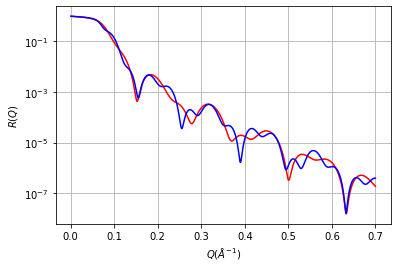

In [7]:
plt.figure()
plt.plot(results_A[0][:,0],results_A[0][:,1],color='red')
plt.plot(results_B[0][:,0],results_B[0][:,1],color='blue')
plt.yscale('log')
plt.xlabel(r'$Q(\AA^{-1})$')
plt.ylabel(r'$R(Q)$')
plt.grid(True)
plt.draw()

we may do the same for the sld profiles that are stored in the second _list_ of the _tuple_ (so [1] in _python_). Also since we have a single patch, our 2-column (z,sld) data are located in results results_A[1][0] and results_B[1][0]. 

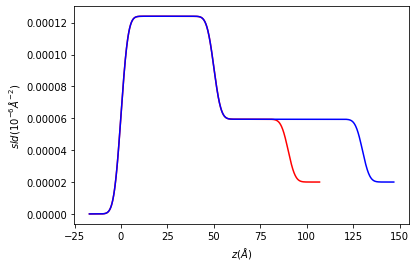

In [8]:
plt.figure()
plt.plot(results_A[1][0][:,0],results_A[1][0][:,1],color='red')
plt.plot(results_B[1][0][:,0],results_B[1][0][:,1],color='blue')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$sld(10^{-6}\AA^{-2})$')
plt.draw()


For reference we include a detailed list of the contents of the _res_ _tuple_ in the current example:

	res[0][i][Q,R,R*Q^4] <- reflectivity list
	res[1][i][z,sld] <- sld list
	res[2][i][z,solv] <- solvent volume fraction list


	where 
	      i the model number starting from 0 (in the current example only one model so 0)
